# Deteksi Komunitas

Implementasi deteksi komunitas dengan algoritma Louvain pada data pertemanan facebook.

Membaca dataset...
Informasi Graf:
 - Jumlah Node (User): 4039
 - Jumlah Edge (Pertemanan): 88234

Menjalankan Algoritma Louvain...
Nilai Modularitas: 0.8349
Jumlah Komunitas ditemukan: 16
Hasil pembagian komunitas disimpan ke 'facebook_communities.csv'
Membuat visualisasi graf (mungkin memakan waktu)...


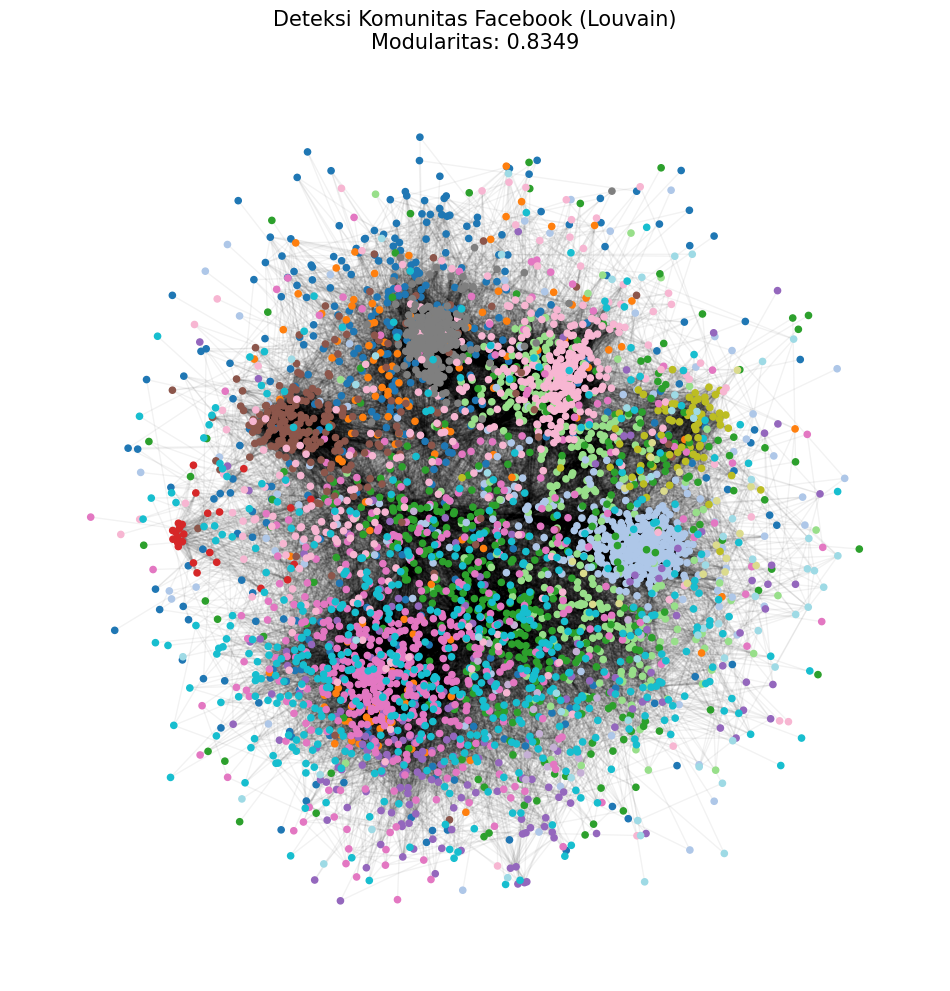

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def process_facebook_data(file_path):
    # 1. Load Data
    # Membaca dataset edge list (format: node1 node2)
    print("Membaca dataset...")
    G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

    print(f"Informasi Graf:")
    print(f" - Jumlah Node (User): {G.number_of_nodes()}")
    print(f" - Jumlah Edge (Pertemanan): {G.number_of_edges()}")

    # 2. Deteksi Komunitas (Algoritma Louvain)
    # Menggunakan implementasi Louvain bawaan NetworkX
    print("\nMenjalankan Algoritma Louvain...")
    communities = nx.community.louvain_communities(G, seed=42)

    # 3. Hitung Modularitas
    # Modularitas mengukur seberapa baik struktur komunitas tersebut
    modularity = nx.community.modularity(G, communities)
    print(f"Nilai Modularitas: {modularity:.4f}")
    print(f"Jumlah Komunitas ditemukan: {len(communities)}")

    # 4. Persiapan Visualisasi
    # Membuat dictionary untuk memetakan setiap node ke ID komunitasnya
    partition = {}
    for idx, comm in enumerate(communities):
        for node in comm:
            partition[node] = idx

    # Simpan hasil pembagian komunitas ke CSV
    df = pd.DataFrame(list(partition.items()), columns=['Node', 'Community_ID'])
    df.to_csv('facebook_communities.csv', index=False)
    print("Hasil pembagian komunitas disimpan ke 'facebook_communities.csv'")

    # 5. Visualisasi Graf
    print("Membuat visualisasi graf (mungkin memakan waktu)...")
    plt.figure(figsize=(12, 12))

    # Menggunakan spring_layout untuk tata letak node
    pos = nx.spring_layout(G, k=0.1, iterations=20, seed=42)

    # Mewarnai node berdasarkan komunitasnya
    cmap = plt.get_cmap('tab20', len(communities))
    node_colors = [partition[n] for n in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_size=20, cmap=cmap, node_color=node_colors)
    nx.draw_networkx_edges(G, pos, alpha=0.05) # Transparansi tinggi agar tidak terlalu penuh

    plt.title(f"Deteksi Komunitas Facebook (Louvain)\nModularitas: {modularity:.4f}", fontsize=15)
    plt.axis('off')
    plt.savefig('facebook_community_graph.png')
    plt.show()

# Jalankan fungsi
# Pastikan file facebook_combined.txt ada di folder yang sama
process_facebook_data('facebook_combined.txt')